In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [13]:
train = pd.read_csv(os.path.join('input/', 'train.csv'))
test = pd.read_csv(os.path.join('input/', 'test.csv'))

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [14]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
dtype: float64

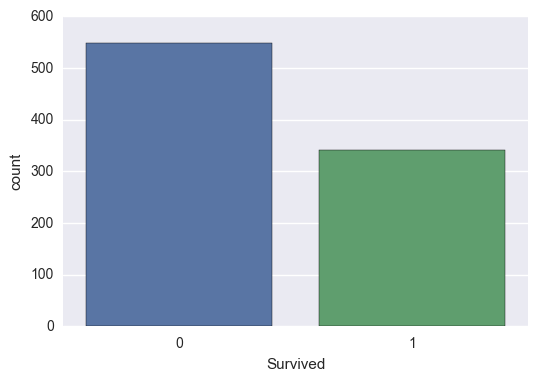

In [15]:
sns.countplot(train['Survived'])

In [16]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

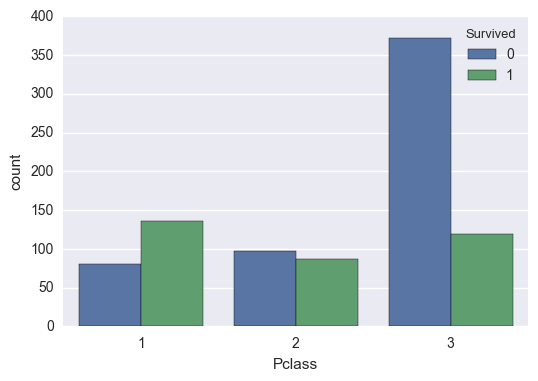

In [17]:
sns.countplot(train['Pclass'], hue=train['Survived'])

In [18]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Capt.          1
Sir.           1
the            1
Don.           1
Jonkheer.      1
Ms.            1
Mme.           1
Lady.          1
dtype: int64

In [19]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [22]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'], 5)).mean()

Name_Len
[12, 19]    0.220588
(19, 23]    0.301282
(23, 27]    0.319797
(27, 32]    0.442424
(32, 82]    0.674556
Name: Survived, dtype: float64

In [28]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
dtype: float64

In [30]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [32]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [33]:
train['Survived'].groupby(pd.qcut(train['Age'], 5)).mean()

Age
[0.42, 19]    0.481707
(19, 25]      0.328467
(25, 31.8]    0.393701
(31.8, 41]    0.437500
(41, 80]      0.373239
Name: Survived, dtype: float64

In [35]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [43]:
train['Family_Size'] = train['SibSp'] + train['Parch']
train['Family_Size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

In [44]:
train['Survived'].groupby(train['Family_Size']).mean()

Family_Size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [46]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [48]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
dtype: int64

In [49]:
train['Survived'].groupby(train['Ticket_Len']).mean()

Ticket_Len
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

In [55]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
dtype: int64

In [54]:
train['Survived'].groupby(train['Ticket_Lett']).mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [58]:
pd.qcut(train['Fare'], 3).value_counts()

[0, 8.662]       308
(26, 512.329]    295
(8.662, 26]      288
dtype: int64

In [59]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
[0, 8.662]       0.198052
(8.662, 26]      0.402778
(26, 512.329]    0.559322
Name: Survived, dtype: float64

In [60]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"[0, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [62]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [64]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
dtype: int64

In [66]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [71]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [77]:
pd.qcut(train['Cabin_num'], 3).value_counts()

(65.667, 148]       67
[2, 28.667]         67
(28.667, 65.667]    66
dtype: int64

In [78]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
[2, 28.667]         0.716418
(28.667, 65.667]    0.651515
(65.667, 148]       0.641791
Name: Survived, dtype: float64

In [85]:
train['Survived'].corr(train['Cabin_num'])

-0.063845959227893573

In [86]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

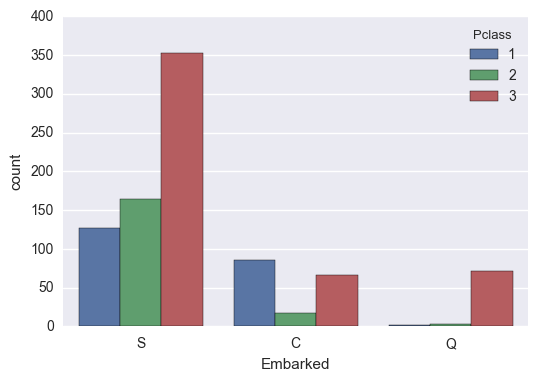

In [87]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

In [88]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [90]:
train.groupby(['Name_Title', 'Pclass'])['Age'].mean()

Name_Title  Pclass
Capt.       1         70.000000
Col.        1         58.000000
Don.        1         40.000000
Dr.         1         43.750000
            2         38.500000
Jonkheer.   1         38.000000
Lady.       1         48.000000
Major.      1         48.500000
Master.     1          5.306667
            2          2.258889
            3          5.350833
Miss.       1         30.000000
            2         22.390625
            3         16.123188
Mlle.       1         24.000000
Mme.        1         24.000000
Mr.         1         41.580460
            2         32.768293
            3         28.724891
Mrs.        1         40.882353
            2         33.682927
            3         33.515152
Ms.         2         28.000000
Rev.        2         43.166667
Sir.        1         49.000000
the         1         33.000000
Name: Age, dtype: float64

In [94]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Name_Len,Family_Size,Ticket_Len,Ticket_Lett,Cabin_Letter,Cabin_num
881,882,0,3,"Markun, Mr. Johann",male,33,0,0,349257,7.8958,NaN,S,Mr.,18,0,6,3,n,NaN
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22,0,0,7552,10.5167,NaN,S,Miss.,28,0,4,7,n,NaN
883,884,0,2,"Banfield, Mr. Frederick James",male,28,0,0,C.A./SOTON 34068,10.5000,NaN,S,Mr.,29,0,16,C,n,NaN
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr.,22,0,15,S,n,NaN
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,NaN,Q,Mrs.,36,5,6,3,n,NaN
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Rev.,21,0,6,2,n,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Miss.,28,0,6,1,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,40,3,10,W,n,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Mr.,21,0,6,1,C,148
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.7500,NaN,Q,Mr.,19,0,6,3,n,NaN


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name_Title     891 non-null object
Name_Len       891 non-null int64
Family_Size    891 non-null int64
Ticket_Len     891 non-null int64
Ticket_Lett    891 non-null object
dtypes: float64(2), int64(8), object(7)
memory usage: 125.3+ KB
